In [12]:
from wiki_dump_extractor import WikiAvroDumpExtractor, page_utils, date_utils
from tqdm.auto import tqdm
import pandas
import gzip
import json
from pathlib import Path

wiki_data_dir = Path("wikipedia_data")
generated_data_dir = Path("generated_data")

dump = WikiAvroDumpExtractor("../wiki_dump.avro", index_dir="../wiki_dump_idx")
df = pandas.read_csv("./places_final.csv")
geopages = set(df.page_title.str.replace("_", " "))


n_pages = 0
selected_pages = []
target = Path("places_with_dates.json")
if not target.exists():
    extracted_dates_dir = Path("../date_extractions")
    for i, f in enumerate(tqdm(list(extracted_dates_dir.glob("*.json.gz")))):
        if "_errors" in f.name:
            continue
        with gzip.open(f, "rt") as f:
            records = json.load(f)
        n_pages += len(records)
        for page, infos in records.items():
            if page not in geopages:
                continue
            if not infos["dates_by_section"]:
                continue
            total_dates = sum(
                [len(dates) for dates in infos["dates_by_section"].values()], 0
            )
            if total_dates > 100:
                continue
            for section, dates in infos["dates_by_section"].items():
                if any(800 < d["date"]["year"] < 2000 for d in dates):
                    selected_pages.append((page, total_dates))
                    break
    with open(target, "w") as f:
        json.dump(selected_pages, f)

with open(target, "r") as f:
    selected_pages = json.load(f)

len(selected_pages)

(array([23758., 43821., 46350., 47190., 45154., 43004., 39326., 34871.,
        30857., 26424., 23844., 20203., 17635., 16555., 15296., 13074.,
        12333., 11051.,  9975.,  8947.,  8265.,  7627.,  6900.,  6306.,
         5828.,  5452.,  4723.,  4373.,  4193.,  3584.,  3460.,  3240.,
         3012.,  2729.,  2582.,  2466.,  2280.,  2126.,  1981.,  1869.,
         1727.,  1682.,  1564.,  1369.,  1336.,  1330.,  1277.,  1151.,
         1080.,  1080.,   953.,   942.,   936.,   875.,   831.,   757.,
          745.,   678.,   656.,   668.,   696.,   644.,   518.,   536.,
          552.,   478.,   485.,   456.,   390.,   423.,   413.,   417.,
          371.,   381.,   348.,   339.,   322.,   343.,   328.,   301.,
          302.,   289.,   280.,   273.,   264.,   260.,   263.,   225.,
          248.,   200.,   222.,   183.,   196.,   226.,   189.,   192.,
          155.,   196.,   171.,   163.]),
 array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
          8.92,   9.91

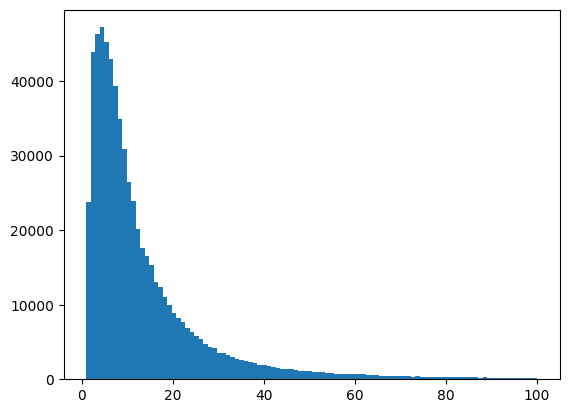

In [10]:
import matplotlib.pyplot as plt

lengths = [n_dates for (p, n_dates) in selected_pages]
plt.hist(lengths, bins=100)

In [ ]:
pages_with_many_dates = [p for (p, n_dates) in selected_pages if n_dates > 20]
len(pages_with_many_dates)
with open("places_with_over_20_dates.json", "w") as f:
    json.dump(pages_with_many_dates, f)